In [3]:
import os
import sys
import time
import numpy as np

from utils.generate_synthetic import simulation, show_synthetic_result
from src.data_class import matrix_class
from src.ICQF import ICQF

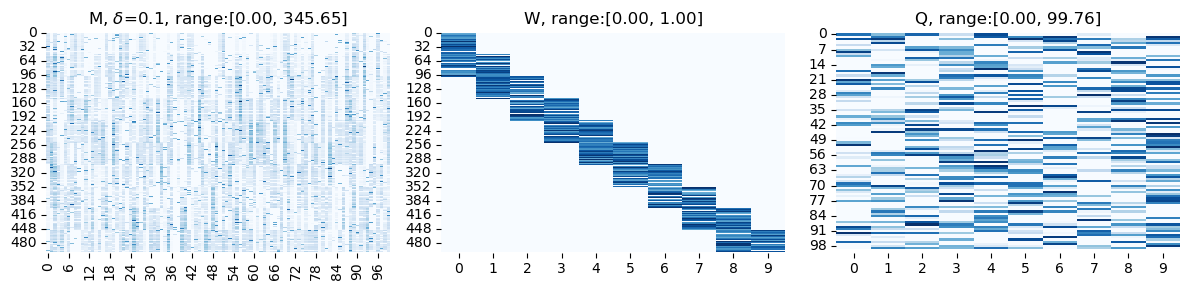

In [4]:
true_W, true_Q, confound_raw, M_clean, M = simulation(500, 100, 10, 50, density=0.5,
                                           noise=True, delta=0.1, confound=False,
                                           visualize=True)

In [5]:
MF_data = matrix_class(M=M, confound_raw=confound_raw)

In [6]:
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 73.609 --  345.648


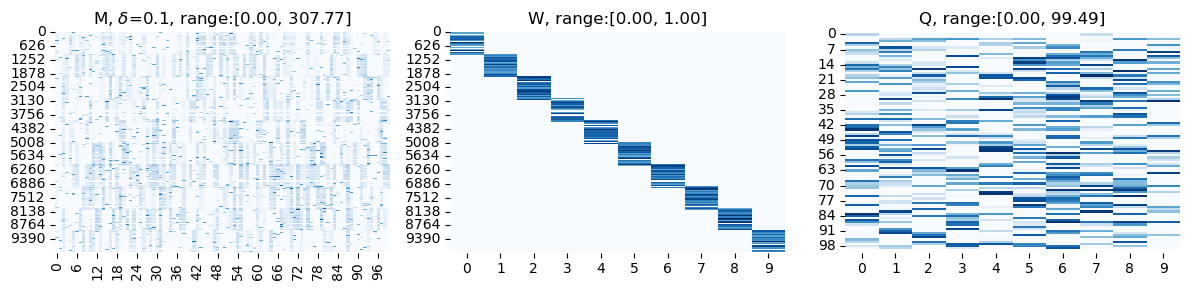

In [7]:
true_W, true_Q, confound_raw, M_clean, M = simulation(10000, 100, 10, 50, density=0.5,
                                           noise=True, delta=0.1, confound=False,
                                           visualize=True)

In [8]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='admm', max_iter=2000, min_iter=10, tol=1e-6)

In [9]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 4.1846s


In [51]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='hybrid', max_iter=2000, min_iter=10, tol=1e-6)

In [52]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 3.7919s


In [53]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6)

In [54]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 0.6240s


In [22]:
# show_synthetic_result(manual_MF_data, true_W, true_Q)

In [17]:
# from sklearn.decomposition import NMF
# model = NMF(n_components=10, init='random', random_state=0, max_iter=500)
# manual_MF_data.W = model.fit_transform(manual_MF_data.M)
# manual_MF_data.Q = model.components_.T
# show_synthetic_result(manual_MF_data, true_W, true_Q)

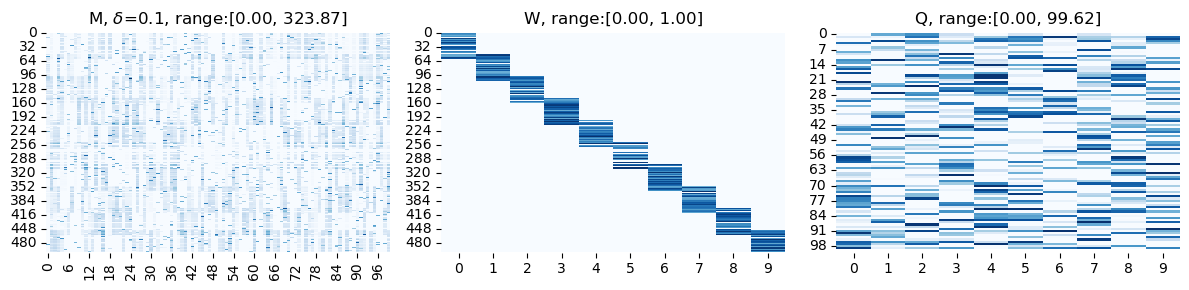

In [55]:
true_W, true_Q, confound_raw, M_clean, M = simulation(500, 100, 10, 10, density=0.5,
                                           noise=True, delta=0.1, confound=False,
                                           visualize=True)

In [56]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6)

In [ ]:
optimal_MF_data, optimal_stat, stat_list = clf.detect_dim(MF_data)

In [57]:
optimal_MF_data, optimal_stat, stat_list = clf.detect_dim(MF_data,
                                                          dimension_list=np.arange(5,15),
                                                          W_beta_list=[0.0,0.01,0.1,1],
                                                          Q_beta_list=[0.0,0.01,0.1,1],
                                                          repeat=2, 
                                                          nfold=20)

estimate detection range
detection range: 5 - 14


repeat-[ 2]: config-[14,1.000,1.000], fold-[ 1], optimal-[10, 710.369]: 100%|██████████| 2/2 [05:09<00:00, 154.51s/it]


In [58]:
optimal_stat

[10, 0.0, 0.01, 738.9808837853894, 710.3692459711033]

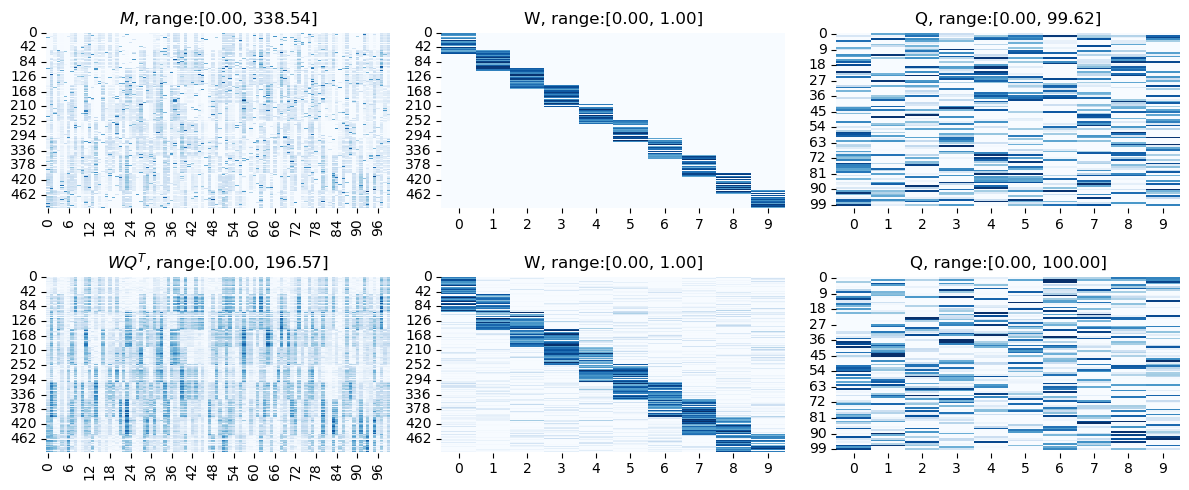

In [59]:
show_synthetic_result(optimal_MF_data, true_W, true_Q)

In [12]:
MF_data.Qc

In [16]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.1044s
solving time : 30.9765s


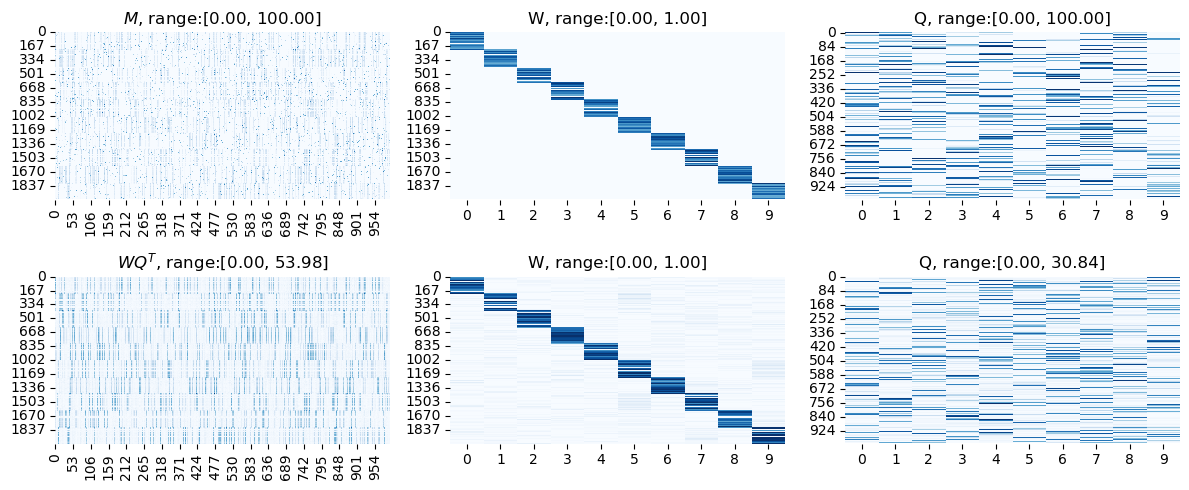

In [17]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

In [45]:
from matplotlib import pyplot
pyplot.plot(loss)

NameError: name 'loss' is not defined

In [24]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='cd', max_iter=500, min_iter=10, tol=1e-4,
           W_beta=0.1, Q_beta=0.0)

In [25]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.7940s
solving time : 21.0455s


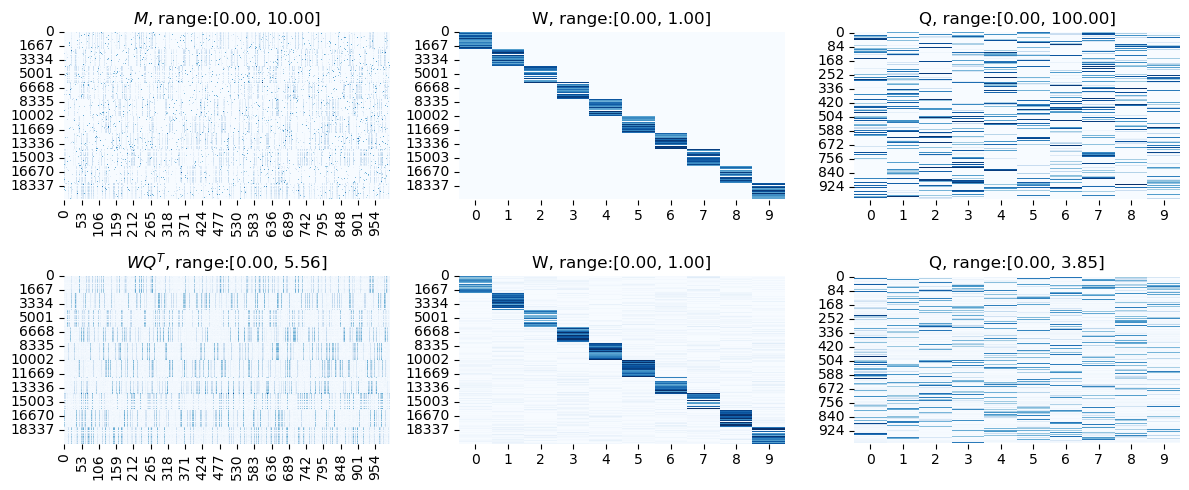

In [26]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

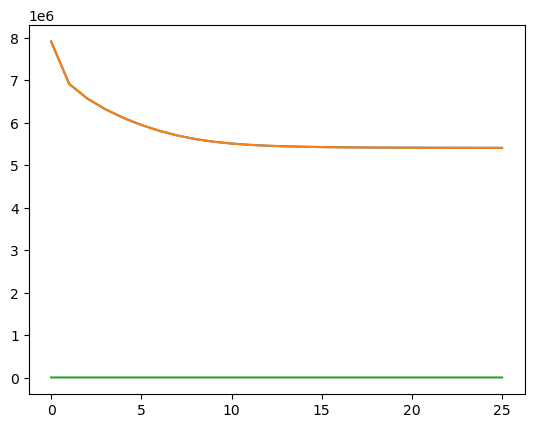

In [27]:
from matplotlib import pyplot
pyplot.plot(loss)

In [10]:
clf = ICQF(n_components=10,
           W_upperbd=(False, 1.0),
           M_upperbd=(False, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='cd', max_iter=4000, min_iter=10, tol=1e-7,
           W_beta=0.0, Q_beta=0.0)

In [11]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.1201s
solving time : 2.9144s


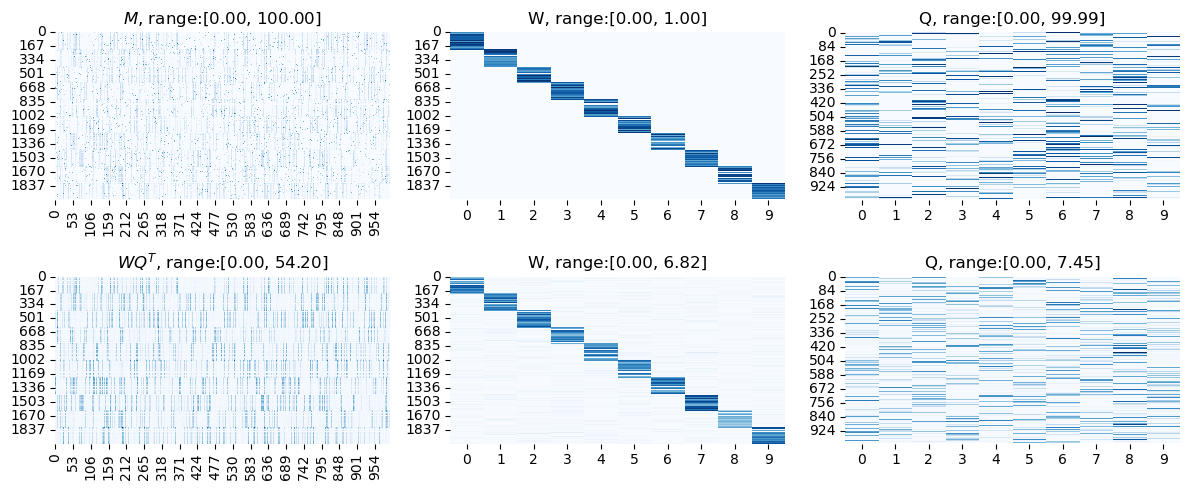

In [12]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

In [18]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='admm', max_iter=500, min_iter=10, tol=1e-4,
           W_beta=0.1, Q_beta=0.0)

In [19]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.0871s
solving time : 29.9448s


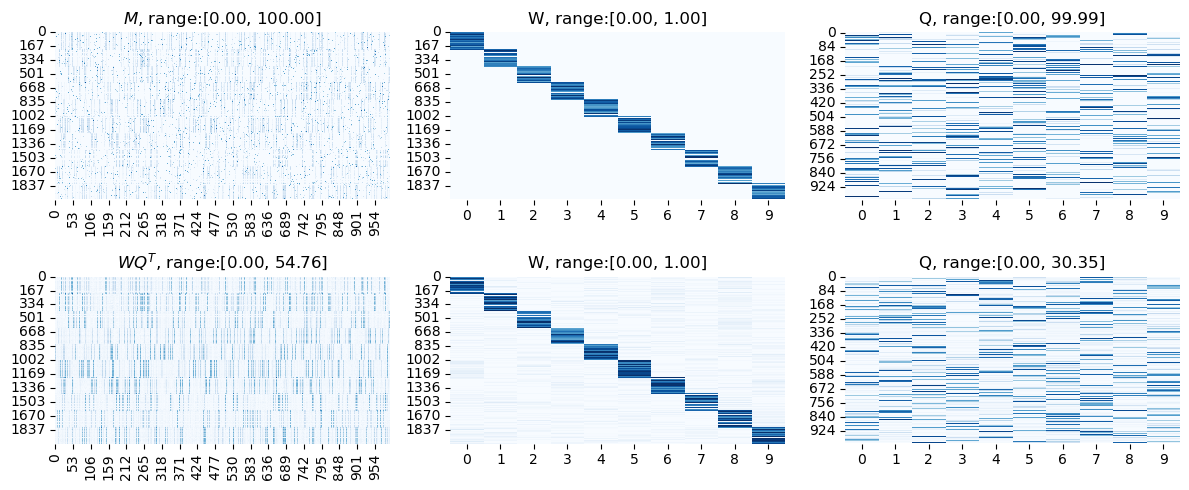

In [20]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

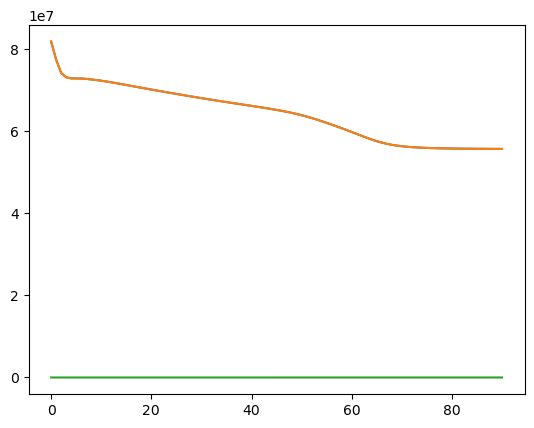

In [21]:
from matplotlib import pyplot
pyplot.plot(loss)

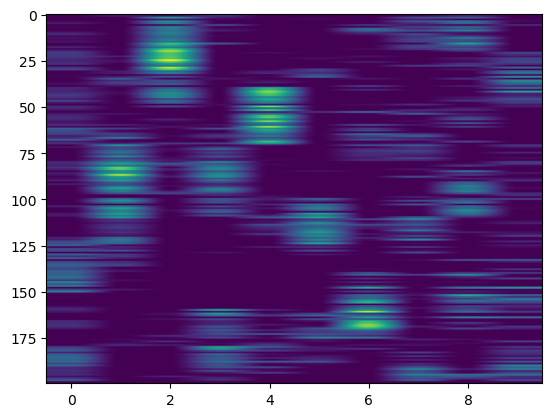

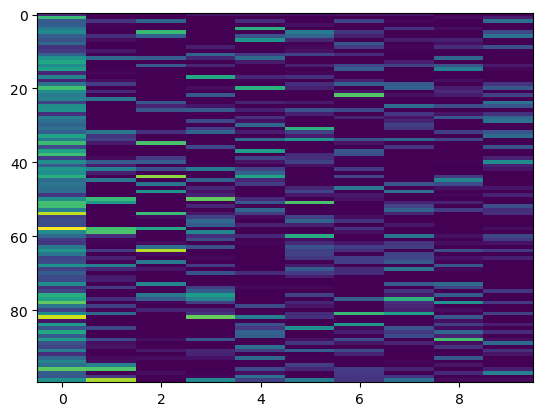

In [10]:
from matplotlib import pyplot
pyplot.imshow(MF_data.W, aspect='auto')
pyplot.show()
pyplot.imshow(MF_data.Q, aspect='auto')
pyplot.show()

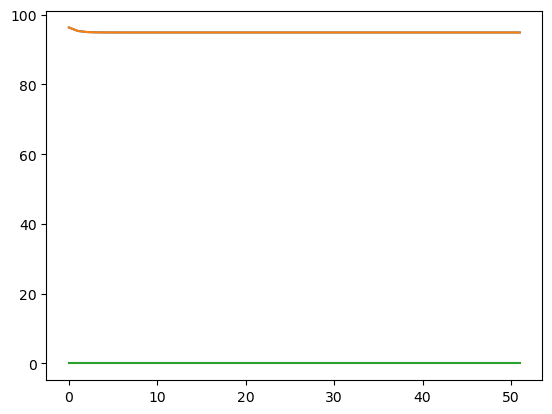

In [11]:
from matplotlib import pyplot
pyplot.plot(loss)

In [12]:
clf = ICQF(n_components=10,
           W_upperbd=(False, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='admm', tau=np.sqrt(2), rho=np.sqrt(2),
           W_beta=0.1, Q_beta=0.1)

In [13]:
MF_data, loss = clf.fit_transform(MF_data)

Initialization time: -0.0335s


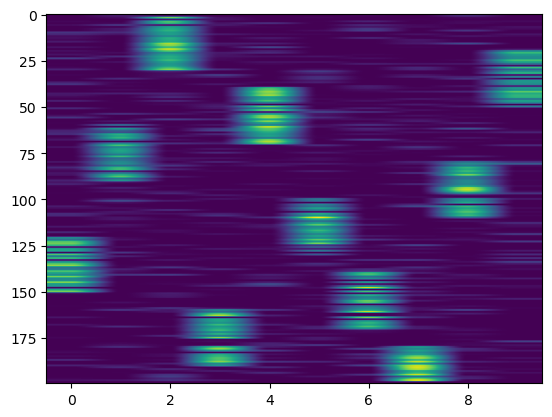

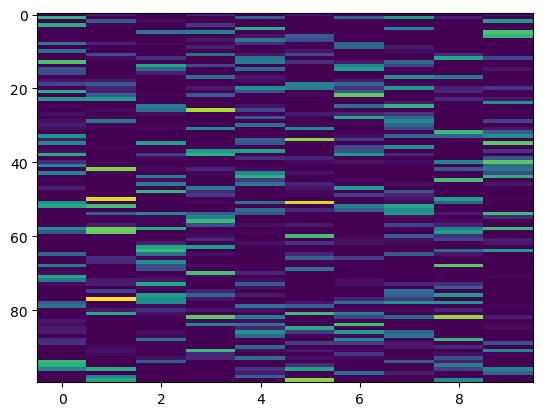

In [14]:
pyplot.imshow(MF_data.W, aspect='auto')
pyplot.show()
pyplot.imshow(MF_data.Q, aspect='auto')
pyplot.show()

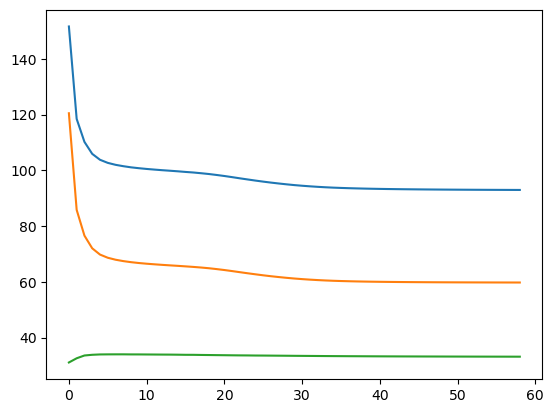

In [15]:
from matplotlib import pyplot
pyplot.plot(loss)

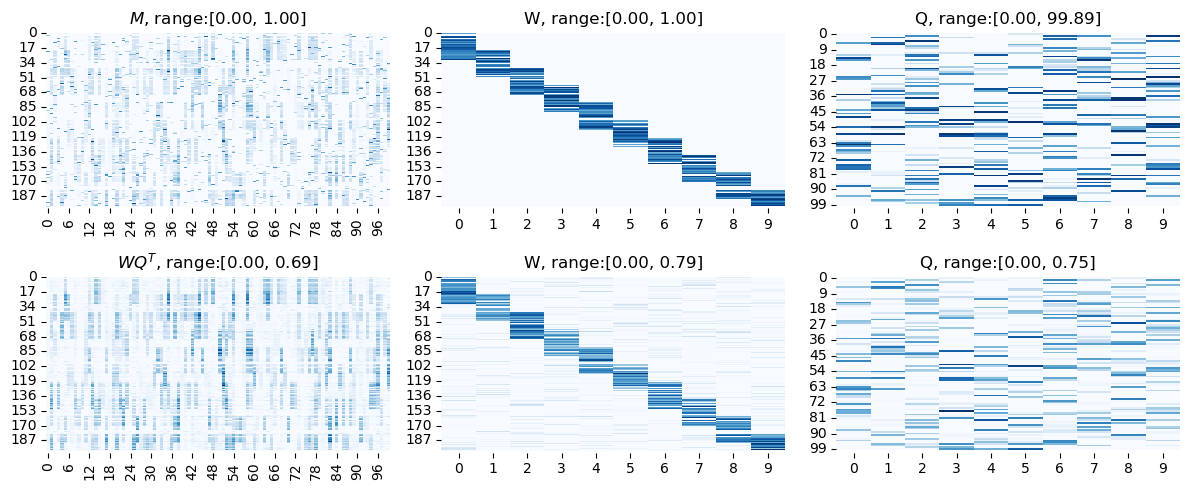

In [16]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

In [23]:
from sklearn.decomposition import NMF
import time
model = NMF(n_components=10, init='random', random_state=0)

tic = time.perf_counter()
W = model.fit_transform(MF_data.M)
H = model.components_

toc = time.perf_counter()

print(f"sklearn NMF solving time : {tic-toc:0.4f}s")

sklearn NMF solving time : -0.0343s


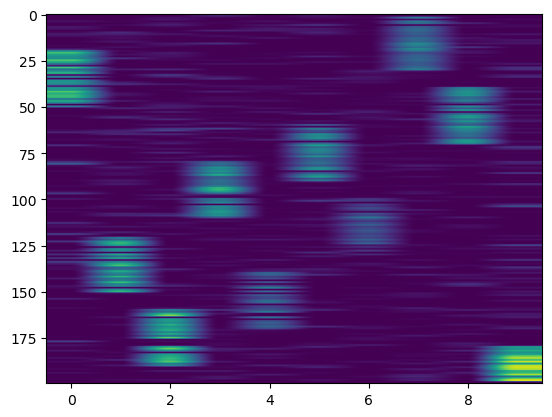

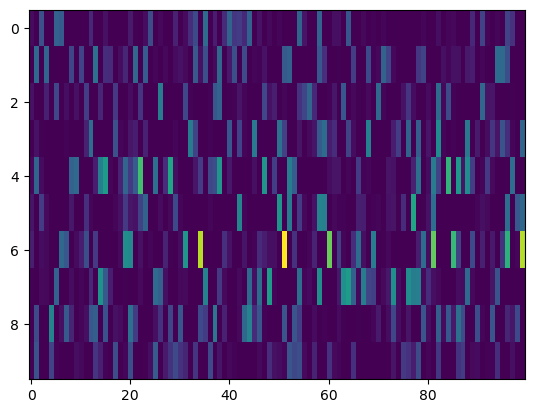

In [24]:
from matplotlib import pyplot
pyplot.imshow(W, aspect='auto')
pyplot.show()
pyplot.imshow(H, aspect='auto')
pyplot.show()

In [25]:
model.n_iter_

36

In [26]:
model.reconstruction_err_

10.903355760840189

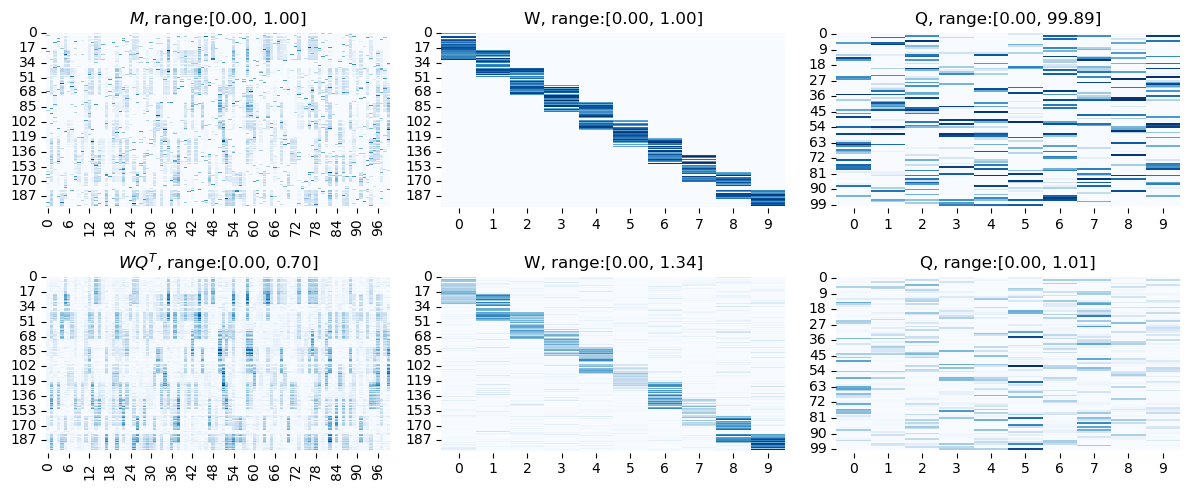

In [27]:
show_synthetic_result(W, H.T, MF_data.M,
                      true_W, true_Q)

In [32]:
np.arange(5,7)

array([5, 6])